In [1]:
import pandas as pd
from scipy.stats import skew, kurtosis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

import pickle

In [2]:

# Load the file into a DataFrame (use pd.read_csv if it's a CSV file)
try:
    # Replace with your file path
    df = pd.read_csv(r"E:/InternshipWork/CustomerSegmentationProject/Dataset/customer_segmentation_large_dataset.csv")
    
    # Check if DataFrame is loaded correctly by printing the first few rows
    print(df.head())  # This will display the first 5 rows of the DataFrame

except Exception as e:
    print(f"Error loading file: {e}")
    df = None  # Ensure that df is defined even if loading fails

  Customer_ID  Gender    Age  Annual_Income  Spending_Score  Purchases  \
0   CUST00001    Male  188.0       174315.0           168.0        171   
1   CUST00002    Male  183.0          150.0           156.0        196   
2   CUST00003  Female  150.0          150.0           184.0        153   
3   CUST00004    Male  199.0       251216.0           199.0        187   
4   CUST00005    Male  187.0       182743.0           169.0        162   

   Loyalty_Score  Account_Tenure_Years Customer_Type Region  Recency  \
0          172.0                   180           VIP  North      227   
1          152.0                   171           VIP  South      233   
2          167.0                   158     Returning   East      182   
3          192.0                   176           VIP  North      244   
4          161.0                   174           New  South      246   

   Frequency  Total_Amount   Monetary  
0        156          9214  59.064103  
1        178          4342  24.393258  
2 

In [3]:
# Proceed only if DataFrame is loaded correctly
if df is not None:
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['number']).columns  # This selects all numerical columns
    
    # Loop through each numerical column and calculate EDA metrics
    for column_name in numerical_columns:
        numerical_column = df[column_name]

        # Calculate mean and median
        mean_value = numerical_column.mean()
        median_value = numerical_column.median()

        # Calculate skewness and kurtosis
        skew_value = skew(numerical_column, nan_policy='omit')  # nan_policy='omit' to handle NaNs
        kurtosis_value = kurtosis(numerical_column, nan_policy='omit')

        # Print results for the current column
        print(f"\n--- EDA for Column: {column_name} ---")
        print(f"Mean: {mean_value}")
        print(f"Median: {median_value}")
        print(f"Skewness: {skew_value}")
        print(f"Kurtosis: {kurtosis_value}")

        # Generate and display summary statistics
        summary = numerical_column.describe()
        print(f"Summary Statistics:\n{summary}")
else:
    print("DataFrame not loaded successfully.")


--- EDA for Column: Age ---
Mean: 171.91169429097607
Median: 171.0
Skewness: 0.10374450513330237
Kurtosis: -1.2524405762015192
Summary Statistics:
count    10860.000000
mean       171.911694
std         15.458116
min        150.000000
25%        158.000000
50%        171.000000
75%        185.000000
max        199.000000
Name: Age, dtype: float64

--- EDA for Column: Annual_Income ---
Mean: 202124.46924493555
Median: 216403.0
Skewness: -1.4232720003467458
Kurtosis: 1.5793953402395156
Summary Statistics:
count     10860.000000
mean     202124.469245
std       78909.291243
min         150.000000
25%      174181.500000
50%      216403.000000
75%      257956.250000
max      299985.000000
Name: Annual_Income, dtype: float64

--- EDA for Column: Spending_Score ---
Mean: 172.28637200736648
Median: 172.0
Skewness: 0.05850281832918414
Kurtosis: -1.2700723272186834
Summary Statistics:
count    10860.000000
mean       172.286372
std         15.499449
min        150.000000
25%        158.000000
5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10860 entries, 0 to 10859
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           10860 non-null  object 
 1   Gender                10860 non-null  object 
 2   Age                   10860 non-null  float64
 3   Annual_Income         10860 non-null  float64
 4   Spending_Score        10860 non-null  float64
 5   Purchases             10860 non-null  int64  
 6   Loyalty_Score         10860 non-null  float64
 7   Account_Tenure_Years  10860 non-null  int64  
 8   Customer_Type         10860 non-null  object 
 9   Region                10860 non-null  object 
 10  Recency               10860 non-null  int64  
 11  Frequency             10860 non-null  int64  
 12  Total_Amount          10860 non-null  int64  
 13  Monetary              10860 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 1.2+ MB


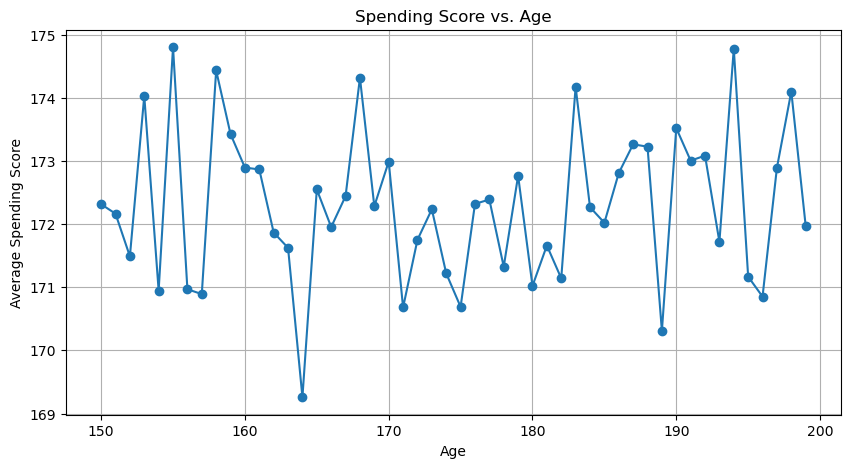

In [4]:
df.describe()
df.info()

df.isnull().sum()



# Line Graph: Age vs. Spending Score
plt.figure(figsize=(10, 5))
plt.plot(df.groupby("Age")["Spending_Score"].mean(), marker='o', linestyle='-')
plt.xlabel("Age")
plt.ylabel("Average Spending Score")
plt.title("Spending Score vs. Age")
plt.grid(True)
plt.show()

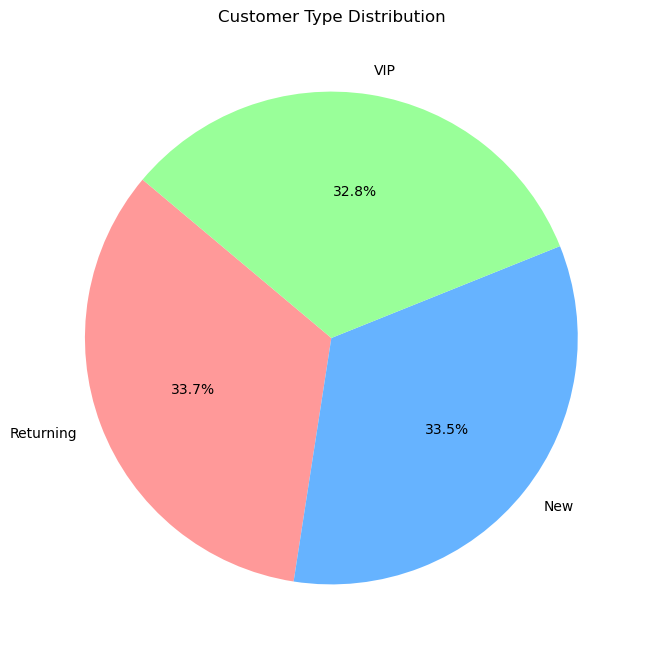

In [5]:
# Pie Chart: Customer Type Distribution
customer_type_counts = df["Customer_Type"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"])
plt.title("Customer Type Distribution")
plt.show()

C:\Users\Jaya\AppData\Local\Temp\ipykernel_123296\3455598001.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Purchases'], df['Total_Amount'], df['Recency'], df['Account_Tenure_Years'],


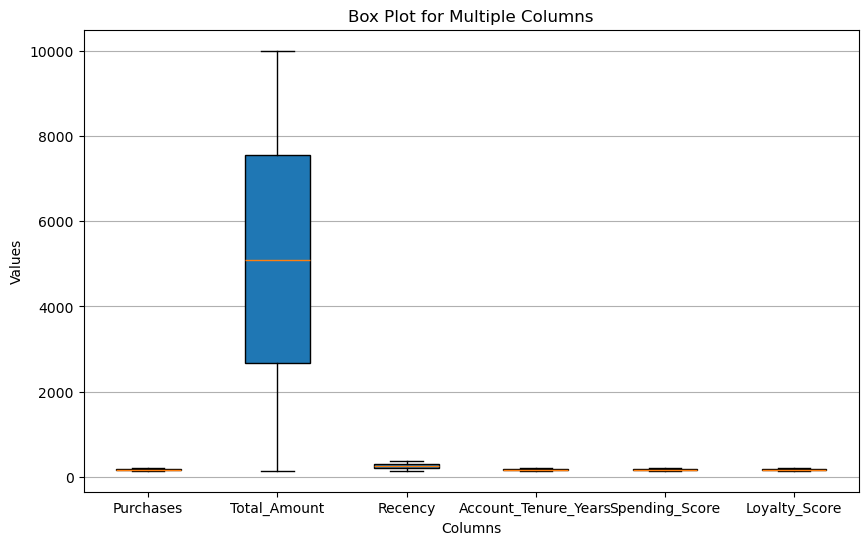

In [6]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['Purchases'], df['Total_Amount'], df['Recency'], df['Account_Tenure_Years'], 
             df['Spending_Score'], df['Loyalty_Score']], 
            labels=['Purchases', 'Total_Amount', 'Recency', 'Account_Tenure_Years', 
                    'Spending_Score', 'Loyalty_Score'], patch_artist=True)

# Customizing the plot
plt.title('Box Plot for Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(axis='y')

# Show the plot
plt.show()

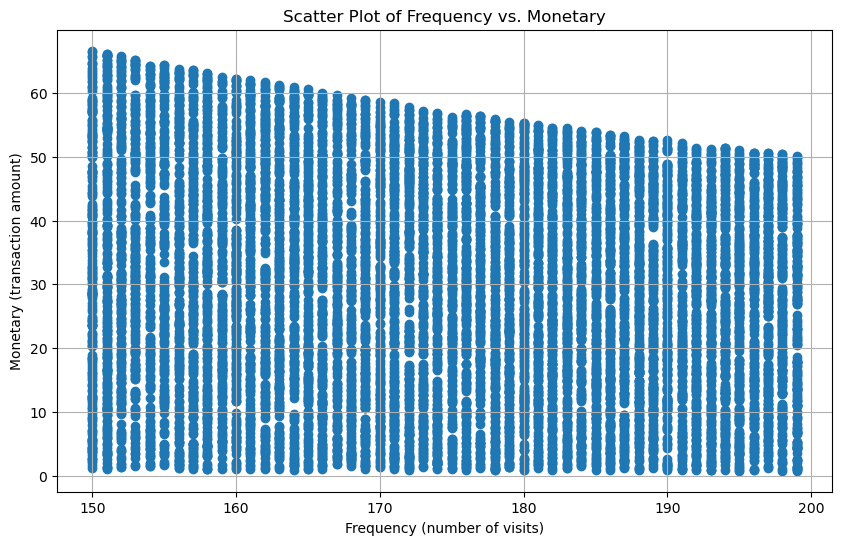

In [7]:
# Drop rows with missing values in 'Frequency' or 'Monetary'
scatter_data = df.dropna(subset=['Frequency', 'Monetary'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['Frequency'], scatter_data['Monetary'])
plt.title('Scatter Plot of Frequency vs. Monetary')
plt.xlabel('Frequency (number of visits)')
plt.ylabel('Monetary (transaction amount)')
plt.grid(True)
plt.show()

In [8]:
#Outliers Tretment

def treat_outliers_quantile(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply the function to all numeric columns
columns_to_treat = df.select_dtypes(include='number').columns  # Select numeric columns
for col in columns_to_treat:
    df[col] = treat_outliers_quantile(df[col])

# Display the modified DataFrame
print("DataFrame after quantile outlier treatment:")
print(df)

DataFrame after quantile outlier treatment:
      Customer_ID  Gender    Age  Annual_Income  Spending_Score  Purchases  \
0       CUST00001    Male  188.0       174315.0           168.0        171   
1       CUST00002    Male  183.0          150.0           156.0        196   
2       CUST00003  Female  150.0          150.0           184.0        153   
3       CUST00004    Male  197.0       251216.0           197.0        187   
4       CUST00005    Male  187.0       182743.0           169.0        162   
...           ...     ...    ...            ...             ...        ...   
10855   CUST10856    Male  190.0       157859.0           151.0        156   
10856   CUST10857    Male  169.0       287858.0           150.0        170   
10857   CUST10858  Female  150.0       248997.0           171.0        156   
10858   CUST10859    Male  158.0       171185.0           188.0        152   
10859   CUST10860    Male  157.0       246726.0           182.0        183   

       Loyalty_Scor

In [9]:
# Convert multiple categorical columns using Label Encoding
def encode_categorical_columns(df, columns):
    encoder = LabelEncoder()
    for col in columns:
        df[col] = encoder.fit_transform(df[col])
    return df

# Select categorical columns to encode
categorical_columns = df.select_dtypes(include='object').columns

# Apply encoding
df_encoded = encode_categorical_columns(df.copy(), categorical_columns)

print("DataFrame after Label Encoding:")
print(df_encoded)


DataFrame after Label Encoding:
       Customer_ID  Gender    Age  Annual_Income  Spending_Score  Purchases  \
0                0       1  188.0       174315.0           168.0        171   
1                1       1  183.0          150.0           156.0        196   
2                2       0  150.0          150.0           184.0        153   
3                3       1  197.0       251216.0           197.0        187   
4                4       1  187.0       182743.0           169.0        162   
...            ...     ...    ...            ...             ...        ...   
10855        10855       1  190.0       157859.0           151.0        156   
10856        10856       1  169.0       287858.0           150.0        170   
10857        10857       0  150.0       248997.0           171.0        156   
10858        10858       1  158.0       171185.0           188.0        152   
10859        10859       1  157.0       246726.0           182.0        183   

       Loyalty_Scor

In [10]:
def save_encoded_data_to_csv(df_encoded, filepath):
    # Save the DataFrame to a CSV file
    df_encoded.to_csv(filepath, index=False)
    print(f"Encoded data saved to {filepath}")

filepath = "E:/InternshipWork/CustomerSegmentationProject/Dataset/encoded_dataset1.csv"
save_encoded_data_to_csv(df_encoded, filepath)

Encoded data saved to E:/InternshipWork/CustomerSegmentationProject/Dataset/encoded_dataset1.csv


In [11]:
# Clustering methods and silhouette scores storage
clustering_results = {}

# K-Means Clustering
range_n_clusters = range(2, 11)
kmeans_silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    kmeans_silhouette_scores.append(silhouette_avg)

best_kmeans_clusters = range_n_clusters[kmeans_silhouette_scores.index(max(kmeans_silhouette_scores))]
clustering_results['K-Means'] = max(kmeans_silhouette_scores)

c:\Users\Jaya\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Jaya\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Jaya\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jaya\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Jaya\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

In [12]:
# Train the K-Means model with the best number of clusters found
kmeans = KMeans(n_clusters=best_kmeans_clusters, random_state=42)
kmeans.fit(df_encoded)

# Save the K-Means model
with open('E:/InternshipWork/CustomerSegmentationProject/kmeans_model1.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [13]:
# Hierarchical Clustering
hierarchical_silhouette_scores = []

for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = hc.fit_predict(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    hierarchical_silhouette_scores.append(silhouette_avg)

best_hierarchical_clusters = range_n_clusters[hierarchical_silhouette_scores.index(max(hierarchical_silhouette_scores))]
clustering_results['Hierarchical'] = max(hierarchical_silhouette_scores)

# Fit the Agglomerative Clustering model with the best number of clusters found
hc = AgglomerativeClustering(n_clusters=best_hierarchical_clusters, linkage='ward')
hc_labels = hc.fit_predict(df_encoded)

In [14]:
# Save the Agglomerative Clustering labels (optional)
with open('E:/InternshipWork/CustomerSegmentationProject/hierarchical_clustering_labels1.pkl', 'wb') as file:
    pickle.dump(hc_labels, file)

In [15]:
# DBSCAN Clustering
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15]
best_dbscan_score = -1
best_dbscan_params = (0.5, 5) 

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df_encoded)
        
        # Only calculate silhouette score if more than one cluster is formed
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(df_encoded, cluster_labels)
            if silhouette_avg > best_dbscan_score:
                best_dbscan_score = silhouette_avg
                best_dbscan_params = (eps, min_samples)
    

clustering_results['DBSCAN'] = best_dbscan_score

# Fit the DBSCAN model with the best parameters found
dbscan = DBSCAN(eps=best_dbscan_params[0], min_samples=best_dbscan_params[1])
dbscan.fit(df_encoded)


DBSCAN()

In [16]:
# Save the DBSCAN model
with open('E:/InternshipWork/CustomerSegmentationProject/dbscan_model1.pkl', 'wb') as file:
    pickle.dump(dbscan, file)

In [17]:
# Printing results
print("Clustering Method Comparison:")
for method, score in clustering_results.items():
    print(f"{method}: Silhouette Score = {score:.4f}")

best_method = max(clustering_results, key=clustering_results.get)
print(f"\nBest Clustering Method: {best_method} with Silhouette Score = {clustering_results[best_method]:.4f}")


Clustering Method Comparison:
K-Means: Silhouette Score = 0.7854
Hierarchical: Silhouette Score = 0.7854
DBSCAN: Silhouette Score = -1.0000

Best Clustering Method: K-Means with Silhouette Score = 0.7854
